In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as st
import pymc3 as pm
import arviz as az

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


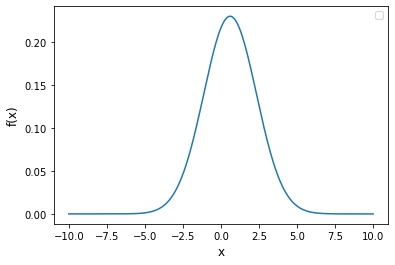

In [2]:
mu1 = 1
sigma1 = 3
sigma2 = 0.1

x_data = np.linspace(-10, 10, 1000)
noise = np.random.normal(loc=0, scale=sigma2, size=len(x_data))
y_data = st.norm.pdf(x_data, loc=mu1, scale=np.sqrt(sigma1)) + noise

plt.style.use('seaborn-darkgrid')
plt.plot(x_data, y_data)
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend(loc=1)
plt.show()

In [4]:
with pm.Model() as model:
    x = pm.Data('x', x_data)
    pred_mu1 = pm.Uniform('mu1', lower=-10, upper=10)
    pred_sigma1 = pm.Uniform('sigma1', lower=0, upper=5)
    pred_sigma2 = pm.Uniform('sigma2', lower=0, upper=5)
    a = (1 / np.sqrt(2 * np.pi * pred_sigma1)) * np.exp(-(((x - pred_mu1)**2) / (2 * pred_sigma1)))
    y = pm.Normal('y', mu=(1 / np.sqrt(2 * np.pi * pred_sigma1)) * np.exp(-(((x - pred_mu1)**2) / (2 * pred_sigma1))), sigma=pred_sigma2, observed=y_data)

In [5]:
with model:
    trace = pm.sample(
        draws=3000,
        tune=1000,
        chains=3,
        return_inferencedata=True
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 4 jobs)
NUTS: [sigma2, sigma1, mu1]


Sampling 3 chains for 1_000 tune and 3_000 draw iterations (3_000 + 9_000 draws total) took 60 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu1,0.920,0.086,0.758,1.081,0.001,0.001,12362.0,6913.0,1.0
sigma1,2.891,0.228,2.461,3.314,0.002,0.002,10535.0,6197.0,1.0
sigma2,0.101,0.002,0.097,0.105,0.000,0.000,11227.0,6461.0,1.0


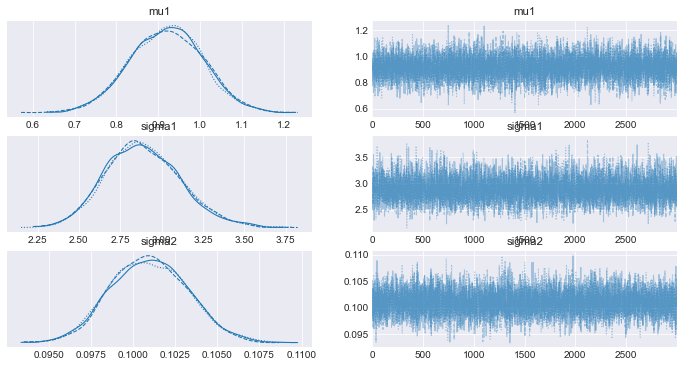

In [6]:
az.plot_trace(trace)
az.summary(trace)

In [7]:
for var_info in az.rhat(trace).values():
    print(var_info.name, var_info.values.round(3) ,sep=' ')

mu1 1.0
sigma1 1.0
sigma2 1.001


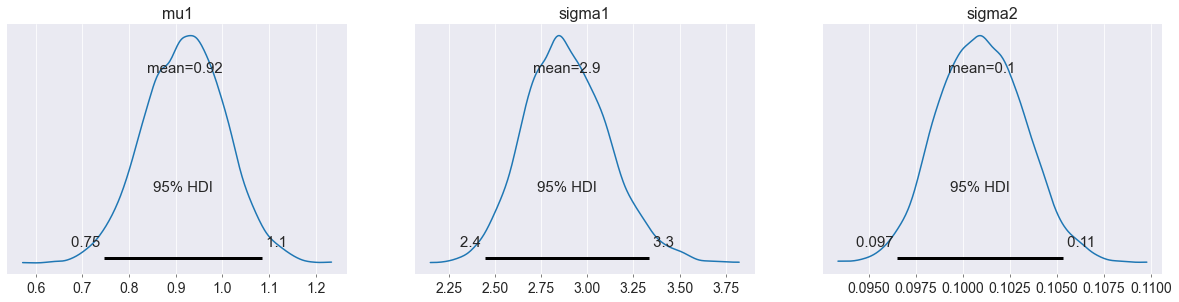

In [8]:
az.plot_posterior(trace, hdi_prob=0.95);